In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ambarish/breakhis")

print("Path to dataset files:", path)

100%|██████████| 3.99G/3.99G [01:12<00:00, 58.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ambarish/breakhis/versions/4


In [ ]:
import os
import shutil

# Define the common directory
common_dir = '/content/datasets/breakhis'

# Check if the dataset exists in common_dir
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    # Move dataset to common directory
    shutil.move('/root/.cache/kagglehub/datasets/ambarish/breakhis/versions/4', common_dir)

print(f"Dataset moved to: {common_dir}")


Dataset moved to: /content/datasets/breakhis


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kasikrit/idc-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.55G/1.55G [00:21<00:00, 78.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1


In [ ]:
import os
import shutil

# Define the common directory
common_dir = '/content/datasets/idc-dataset'

# Check if the dataset exists in common_dir
if not os.path.exists(common_dir):
    os.makedirs(common_dir)
    # Move dataset to common directory
    shutil.move('/root/.cache/kagglehub/datasets/kasikrit/idc-dataset/versions/1', common_dir)

print(f"Dataset moved to: {common_dir}")


Dataset moved to: /content/datasets/idc-dataset


Code for File: train_MobileNet.py

In [ ]:
import os
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Dropout

from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger
import time
import itertools
import cv2
from glob import glob
import matplotlib.pyplot as plt
import keras.backend as K
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
import math

import keras
from tensorflow.keras.regularizers import l2

In [ ]:
# Define dataset paths
train_data_dir = '/content/datasets/idc-dataset/1/IDC/training'
valid_data_dir = '/content/datasets/idc-dataset/1/IDC/validation'

# Check if the directories exist
if os.path.exists(train_data_dir):
    print(f"Training data directory exists: {train_data_dir}")
    print("Contents of the training directory:")
    print(os.listdir(train_data_dir))
else:
    print(f"Training data directory NOT found: {train_data_dir}")

if os.path.exists(valid_data_dir):
    print(f"Validation data directory exists: {valid_data_dir}")
    print("Contents of the validation directory:")
    print(os.listdir(valid_data_dir))
else:
    print(f"Validation data directory NOT found: {valid_data_dir}")

Training data directory exists: /content/datasets/idc-dataset/1/IDC/training
Contents of the training directory:
['0', '1']
Validation data directory exists: /content/datasets/idc-dataset/1/IDC/validation
Contents of the validation directory:
['0', '1']


<ipython-input-27-1ffcaeb1e5c9>:54: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights=weights, include_top=False)


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, None, None, 32)      │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, None, None, 32)      │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, None, None, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, None, None, 32)      │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, None, None, 32)      │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, None, None, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, None, None, 64)      │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, None, None, 64)      │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, None, None, 64)      │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, None, None, 64)      │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, None, None, 128)     │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, None, None, 128)     │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, None, None, 128)     │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, None, None, 128)     │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, None, None, 128)     │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,230,914 (12.32 MB)

 Trainable params: 2,050 (8.01 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

None
Number of layers in the base model:  89
TensorFlow: 2.17.1


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1063: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn(


Found 199818 images belonging to 2 classes.
Found 22201 images belonging to 2 classes.


82 ops no flops stats due to incomplete shapes.


FLOPS: 3.49e-05 G
Found 199818 images belonging to 2 classes.
Found 22201 images belonging to 2 classes.
Loading network from ImageNet weights.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7246 - loss: 0.9630
Epoch 1: val_loss improved from inf to 1.95955, saving model to Data/checkpoints/IDCMobileNet.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 303s 186ms/step - accuracy: 0.7247 - loss: 0.9629 - val_accuracy: 0.6790 - val_loss: 1.9596 - learning_rate: 0.0010
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7531 - loss: 0.7139
Epoch 2: val_loss improved from 1.95955 to 0.26920, saving model to Data/checkpoints/IDCMobileNet.keras


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 168s 134ms/step - accuracy: 0.7531 - loss: 0.7138 - val_accuracy: 1.0000 - val_loss: 0.2692 - learning_rate: 0.0010
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7492 - loss: 0.6462
Epoch 3: val_loss did not improve from 0.26920
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 229s 183ms/step - accuracy: 0.7492 - loss: 0.6462 - val_accuracy: 0.7893 - val_loss: 0.5554 - learning_rate: 0.0010
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7373 - loss: 0.6433
Epoch 4: val_loss improved from 0.26920 to 0.01565, saving model to Data/checkpoints/IDCMobileNet.keras

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 168s 134ms/step - accuracy: 0.7373 - loss: 0.6432 - val_accuracy: 1.0000 - val_loss: 0.0156 - learning_rate: 0.0010
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.7596 - loss: 0.5614
Epoch 5: val_loss did not improve from 0.01565
1250/1250 ━━━━━━━

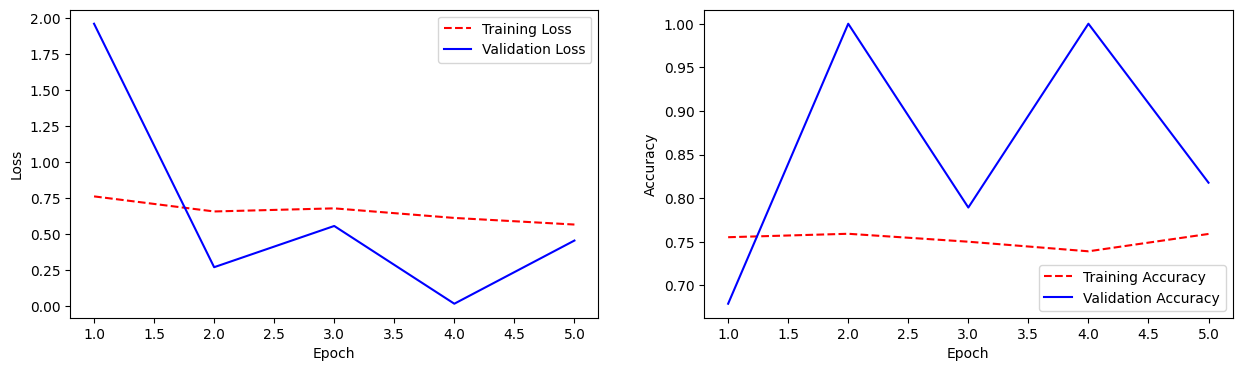

In [ ]:
batch_size=8
checkpointer = ModelCheckpoint(
    filepath=os.path.join('Data', 'checkpoints', 'IDCMobileNet.keras'),
    verbose=1,
    save_best_only=True)


early_stopper = EarlyStopping(monitor='val_loss', patience=10)

# Helper: TensorBoard
tensorboard = TensorBoard(log_dir=os.path.join('Data', 'logs'))
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('Data', 'logs', 'IDCMobileNet' + '-' + 'training-' + \
        str(timestamp) + '.log'))

def get_generators():
    train_datagen = ImageDataGenerator(
        featurewise_std_normalization=True,
        rescale=1./255,
                zoom_range=0.2,
                #brightness_range=(0.9, 1.1),
                rotation_range=0.2,
                #shear_range=0.2,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip=True,
                vertical_flip=True,
                fill_mode='nearest'
                )
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        classes=['0', '1'],
        #classes=['Benign', 'Malignant'],
        #classes=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma'],
        class_mode='categorical')

    validation_generator = test_datagen.flow_from_directory(
        valid_data_dir,
        target_size=(50, 50),
        batch_size=batch_size,
        classes=['0', '1'],
        #classes=['Benign', 'Malignant'],
        #classes=['adenosis', 'ductal_carcinoma', 'fibroadenoma', 'lobular_carcinoma', 'mucinous_carcinoma', 'papillary_carcinoma', 'phyllodes_tumor', 'tubular_adenoma'],
        class_mode='categorical')

    return train_generator, validation_generator

def get_model(weights='imagenet'):

    base_model = MobileNet(weights=weights, include_top=False)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    x = Dropout(0.4)(x)

    predictions = Dense(2, activation='softmax')(x)


    model = Model(inputs=base_model.input, outputs=predictions)
    return model

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
def freeze_all_but_top(model):

    for layer in model.layers[:20]:
        layer.trainable=False
    for layer in model.layers[20:]:
        layer.trainable=True

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


    return model

def train_model(model, nb_epoch, generators, callbacks=[]):
    train_generator, validation_generator = generators
    from sklearn.utils import class_weight
    import numpy as np

    his=model.fit(
        train_generator,
        steps_per_epoch=10000 // batch_size,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.filenames) // batch_size,
        epochs=nb_epoch,
        #class_weight=class_weights,
        callbacks=callbacks)

    fig, axs = plt.subplots(1, 2, figsize = (15, 4))
    training_loss = his.history['loss']
    validation_loss = his.history['val_loss']
    training_accuracy = his.history['accuracy']
    validation_accuracy = his.history['val_accuracy']
    epoch_count = range(1, len(training_loss) + 1)
    #N=num_epochs
    axs[0].plot(epoch_count, training_loss, 'r--')
    axs[0].plot(epoch_count, validation_loss, 'b-')
    axs[0].legend(['Training Loss', 'Validation Loss'])
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[1].plot(epoch_count, training_accuracy, 'r--')
    axs[1].plot(epoch_count, validation_accuracy, 'b-')
    axs[1].legend(['Training Accuracy', 'Validation Accuracy'])
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")
    fig.savefig('IDCMobileNet.png')
    return model

def main(weights_file):
    model = get_model()
    print(model.summary())
    print("Number of layers in the base model: ", len(model.layers))
    import tensorflow as tf
    from tensorflow.python.profiler.model_analyzer import profile
    from tensorflow.python.profiler.option_builder import ProfileOptionBuilder
    print('TensorFlow:', tf.__version__)

    generators = get_generators()

    forward_pass = tf.function(
        model.call,
        input_signature=[tf.TensorSpec(shape=(1,) + model.input_shape[1:])])

    graph_info = profile(forward_pass.get_concrete_function().graph,
                            options=ProfileOptionBuilder.float_operation())


    flops = graph_info.total_float_ops // 2
    print(f"FLOPS: {flops / 10 ** 9:.03} G")

    generators = get_generators()

    if weights_file is None:
        print("Loading network from ImageNet weights.")

        model = freeze_all_but_top(model)
        model = train_model(model, 5, generators,
                        [checkpointer, early_stopper, tensorboard, csv_logger,learning_rate_reduction])
    else:
        print("Loading saved model: %s." % weights_file)
        model.load_weights(weights_file)




if __name__ == '__main__':
    weights_file = None
    #print(len(data.classes))
    main(weights_file)